In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [8]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [9]:
test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [10]:
num_columns = train.select_dtypes(include=['float64','int64']).columns
cat_columns = train.select_dtypes(include=['object']).columns

In [11]:
train[num_columns].isnull().sum()

id                         0
Age                        0
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Work/Study Hours           0
Financial Stress           4
Depression                 0
dtype: int64

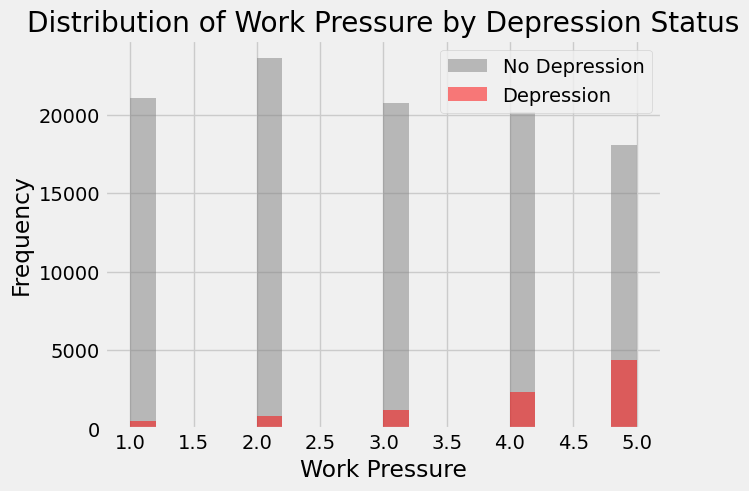

In [12]:
plt.hist(train[train['Depression'] == 0]['Work Pressure'], bins=20,  label='No Depression', color='grey',alpha=.5)
plt.hist(train[train['Depression'] == 1]['Work Pressure'], bins=20,  label='Depression', color='red',alpha=.5)
plt.xlabel('Work Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Work Pressure by Depression Status')
plt.legend()
plt.show()


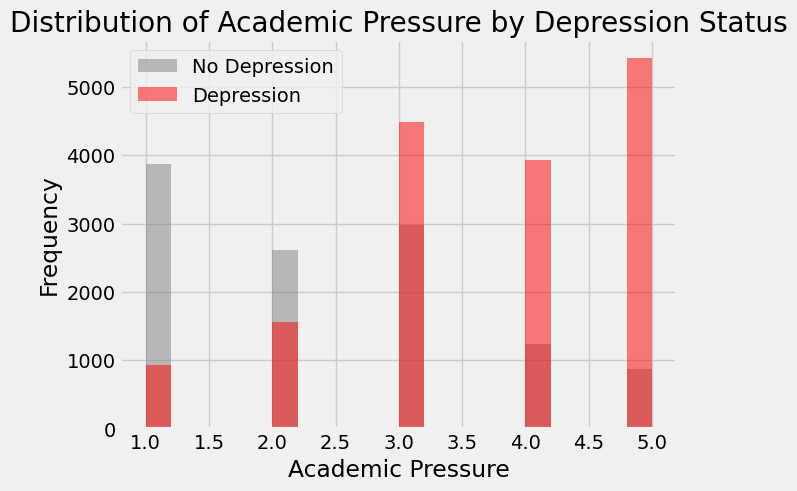

In [13]:
plt.hist(train[train['Depression']==0]['Academic Pressure'],bins=20,label='No Depression',color='grey',alpha=.5)
plt.hist(train[train['Depression']==1]['Academic Pressure'],bins=20,label='Depression',color='red',alpha=.5)

plt.xlabel('Academic Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Academic Pressure by Depression Status')
plt.legend()
plt.show()

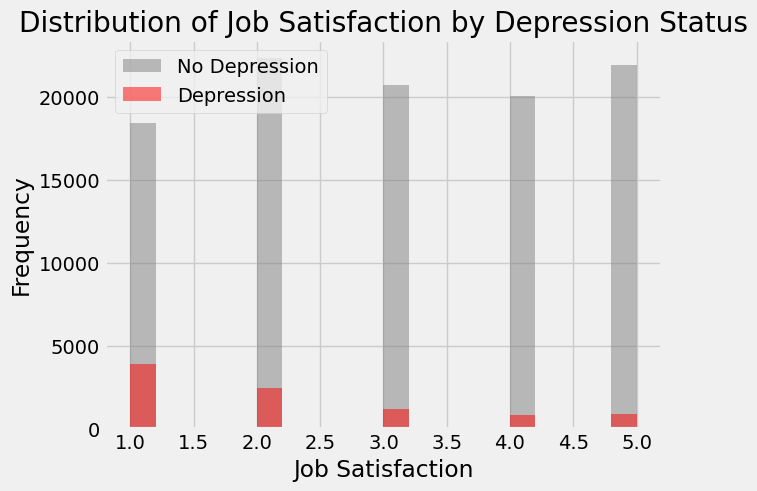

In [14]:
plt.hist(train[train['Depression']==0]['Job Satisfaction'],bins=20,label='No Depression',color='grey',alpha=.5)
plt.hist(train[train['Depression']==1]['Job Satisfaction'],bins=20,label='Depression',color='red',alpha=.5)

plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.title('Distribution of Job Satisfaction by Depression Status')
plt.legend()
plt.show()

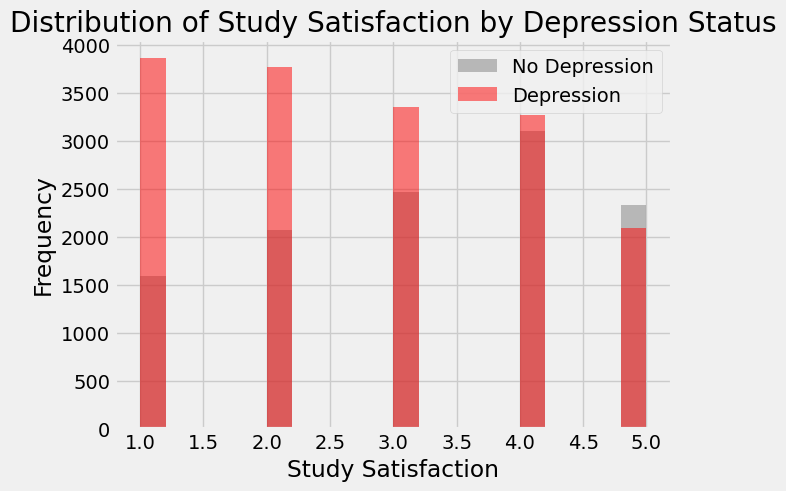

In [15]:

plt.hist(train[train['Depression']==0]['Study Satisfaction'],bins=20,label='No Depression',color='grey',alpha=.5)
plt.hist(train[train['Depression']==1]['Study Satisfaction'],bins=20,label='Depression',color='red',alpha=.5)

plt.xlabel('Study Satisfaction')
plt.ylabel('Frequency')
plt.title('Distribution of Study Satisfaction by Depression Status')
plt.legend()
plt.show()

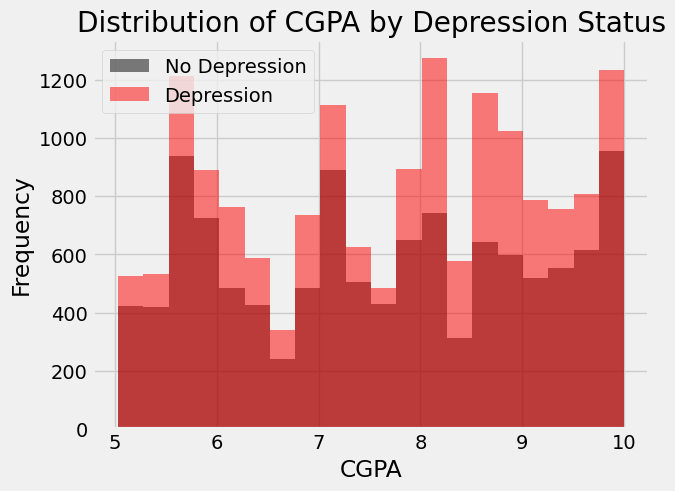

In [16]:
plt.hist(train[train['Depression']==0]['CGPA'],bins=20,label='No Depression',color='black',alpha=.5)
plt.hist(train[train['Depression']==1]['CGPA'],bins=20,label='Depression',color='red',alpha=.5)

plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA by Depression Status')
plt.legend()
plt.show()

In [17]:
def fillna_num (df):
    columns = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction']
    
    for column in columns:
        if column=='CGPA':
                 df[column] = df[column].fillna(-1)
        else:
                df[column] = df[column].fillna(0)
    
    return df


In [18]:
train = fillna_num(train)
test = fillna_num(test)

In [19]:
train['pressure']=train['Work Pressure']+train['Academic Pressure']*5
test['pressure']=test['Work Pressure']+test['Academic Pressure']*5

train['satisfaction']=train['Study Satisfaction']+train['Job Satisfaction']*7
test['satisfaction']=test['Study Satisfaction']+test['Job Satisfaction']*7

In [20]:
train = train.drop(columns=['Work Pressure', 'Academic Pressure','CGPA','Study Satisfaction','Job Satisfaction'])
test = test.drop(columns=['Work Pressure', 'Academic Pressure','CGPA','Job Satisfaction','Study Satisfaction'])

In [21]:
train['Financial Stress'].value_counts()


Financial Stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

In [22]:
train['Financial Stress'].isnull().sum()

4

In [23]:
train['Financial Stress'] = train['Financial Stress'].fillna(float(train['Financial Stress'].median()))
test['Financial Stress'] = test['Financial Stress'].fillna(float(test['Financial Stress'].median()))

In [24]:
num_columns = train.select_dtypes(include=['float64','int64']).columns
cat_columns = train.select_dtypes(include=['object']).columns

In [25]:
train[num_columns].isnull().sum()

id                  0
Age                 0
Work/Study Hours    0
Financial Stress    0
Depression          0
pressure            0
satisfaction        0
dtype: int64

In [26]:
train[num_columns].describe()

,id,Age,Work/Study Hours,Financial Stress,Depression,pressure,satisfaction
count,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000,140700.000000
mean,70349.500000,40.388621,6.252679,2.988984,0.181713,5.519069,17.274598
std,40616.735775,12.384099,3.853615,1.413613,0.385609,6.059897,11.399925
min,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,35174.750000,29.000000,3.000000,2.000000,0.000000,2.000000,7.000000
50%,70349.500000,42.000000,6.000000,3.000000,0.000000,4.000000,14.000000
75%,105524.250000,51.000000,10.000000,4.000000,0.000000,5.000000,28.000000
max,140699.000000,60.000000,12.000000,5.000000,1.000000,25.000000,35.000000


In [27]:
test[cat_columns].isnull().sum()

Name                                         0
Gender                                       0
City                                         0
Working Professional or Student              0
Profession                               24632
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Family History of Mental Illness             0
dtype: int64

In [28]:
def fillna_cat(df):
    columns = ['Profession', 'Dietary Habits', 'Degree']
    for column in columns:
        df[column].fillna('other', inplace=True)
    return df

In [29]:
train = fillna_cat(train)
test = fillna_cat(test)

/tmp/ipykernel_23/616016265.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('other', inplace=True)


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Sleep Duration                         140700 non-null  object 
 8   Dietary Habits                         140700 non-null  object 
 9   Degree                                 140700 non-null  object 
 10  Have you ever had suicidal thoughts ?  140700 non-null  

In [31]:
def fill_less_frequent_value(df):
    columns = ['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']
    for column in columns:
        count = df[column].value_counts()
        less_freq = count[count<20].index
        df[column] = df[column].apply(lambda x: 'other' if x in less_freq else x)
    return df

In [32]:
train = fill_less_frequent_value(train)
test = fill_less_frequent_value(test)

In [33]:
train[cat_columns].isnull().sum()

Name                                     0
Gender                                   0
City                                     0
Working Professional or Student          0
Profession                               0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Family History of Mental Illness         0
dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', sparse=False)  


'''train_encoded = encoder.fit_transform(train[['Sleep Duration']])
test_encoded = encoder.transform(test[['Sleep Duration']])


train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['Sleep Duration']))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['Sleep Duration']))


train = pd.concat([train.drop(columns=['Sleep Duration']), train_encoded_df], axis=1)
test = pd.concat([test.drop(columns=['Sleep Duration']), test_encoded_df], axis=1)'''


"train_encoded = encoder.fit_transform(train[['Sleep Duration']])\ntest_encoded = encoder.transform(test[['Sleep Duration']])\n\n\ntrain_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['Sleep Duration']))\ntest_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['Sleep Duration']))\n\n\ntrain = pd.concat([train.drop(columns=['Sleep Duration']), train_encoded_df], axis=1)\ntest = pd.concat([test.drop(columns=['Sleep Duration']), test_encoded_df], axis=1)"

In [35]:
train_encoded = encoder.fit_transform(train[['Have you ever had suicidal thoughts ?']])
test_encoded = encoder.transform(test[['Have you ever had suicidal thoughts ?']])


train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['Have you ever had suicidal thoughts ?']))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['Have you ever had suicidal thoughts ?']))


train = pd.concat([train.drop(columns=['Have you ever had suicidal thoughts ?']), train_encoded_df], axis=1)
test = pd.concat([test.drop(columns=['Have you ever had suicidal thoughts ?']), test_encoded_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
train_encoded = encoder.fit_transform(train[['Family History of Mental Illness']])
test_encoded = encoder.transform(test[['Family History of Mental Illness']])


train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['Family History of Mental Illness']))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['Family History of Mental Illness']))


train = pd.concat([train.drop(columns=['Family History of Mental Illness']), train_encoded_df], axis=1)
test = pd.concat([test.drop(columns=['Family History of Mental Illness']), test_encoded_df], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
from sklearn.preprocessing import OrdinalEncoder

def encoding(df):
    cat_columns = df.select_dtypes(include='object').columns
    
    encoder = OrdinalEncoder()
    df[cat_columns] = encoder.fit_transform(df[cat_columns].astype(str))
    
    return df

In [38]:
'''train = encoding(train)
test = encoding(test)'''

'train = encoding(train)\ntest = encoding(test)'

In [39]:
X = train.drop(['id', 'Name', 'City', 'Depression'], axis=1)
X_test = test.drop(['id', 'Name', 'City'], axis=1)
y = train['Depression']

In [40]:
cat_columns = X_test.select_dtypes(include='object').columns.tolist()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=1
)

In [42]:
import optuna
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    cat_params = dict(
        iterations = trial.suggest_int("iterations", 100, 1000),
        learning_rate = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth = trial.suggest_int("depth", 4, 10),
        l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bagging_temperature = trial.suggest_float('bagging_temperature', 0, 1.5),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        task_type='GPU',
        early_stopping_rounds=200,
        verbose=False
    )
    
    model = CatBoostClassifier(**cat_params)
    X_train_pool = Pool(X_train, y_train,cat_features=cat_columns)
    X_valid_pool = Pool(X_val, y_val,cat_features=cat_columns)
    model.fit(X=X_train_pool, eval_set=X_valid_pool)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    return score

In [43]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
catboost_params = study.best_params

[I 2024-11-04 16:41:38,349] A new study created in memory with name: no-name-fb3ebc48-d446-4a65-b298-a80b47ce38f7
[I 2024-11-04 16:41:56,318] Trial 0 finished with value: 0.9389481165600568 and parameters: {'iterations': 629, 'learning_rate': 0.01419758547159168, 'depth': 7, 'l2_leaf_reg': 0.03899334040277747, 'bagging_temperature': 0.9102822785529421, 'random_strength': 0.0005261686227106867}. Best is trial 0 with value: 0.9389481165600568.
[I 2024-11-04 16:42:10,001] Trial 1 finished with value: 0.9290689410092395 and parameters: {'iterations': 681, 'learning_rate': 0.0011741684047074225, 'depth': 6, 'l2_leaf_reg': 1.5163690905681113e-05, 'bagging_temperature': 1.3133757824470003, 'random_strength': 0.6257000787254997}. Best is trial 0 with value: 0.9389481165600568.
[I 2024-11-04 16:42:37,417] Trial 2 finished with value: 0.9395167022032693 and parameters: {'iterations': 775, 'learning_rate': 0.010802034665237447, 'depth': 8, 'l2_leaf_reg': 0.004649522578861259, 'bagging_temperature

In [44]:
best_model = CatBoostClassifier(**catboost_params)
X_train_pool = Pool(X_train, y_train, cat_features=cat_columns)
X_valid_pool = Pool(X_val, y_val, cat_features=cat_columns)
best_model.fit(X=X_train_pool, eval_set=X_valid_pool)

0:	learn: 0.5575912	test: 0.5564302	best: 0.5564302 (0)	total: 175ms	remaining: 2m 53s
1:	learn: 0.4624934	test: 0.4608784	best: 0.4608784 (1)	total: 342ms	remaining: 2m 49s
2:	learn: 0.4081843	test: 0.4066450	best: 0.4066450 (2)	total: 436ms	remaining: 2m 24s
3:	learn: 0.3600239	test: 0.3579022	best: 0.3579022 (3)	total: 528ms	remaining: 2m 10s
4:	learn: 0.3430238	test: 0.3406430	best: 0.3406430 (4)	total: 564ms	remaining: 1m 51s
5:	learn: 0.3099479	test: 0.3074528	best: 0.3074528 (5)	total: 633ms	remaining: 1m 44s
6:	learn: 0.2878887	test: 0.2850742	best: 0.2850742 (6)	total: 708ms	remaining: 1m 40s
7:	learn: 0.2655527	test: 0.2627535	best: 0.2627535 (7)	total: 783ms	remaining: 1m 36s
8:	learn: 0.2539308	test: 0.2510235	best: 0.2510235 (8)	total: 857ms	remaining: 1m 33s
9:	learn: 0.2429139	test: 0.2400543	best: 0.2400543 (9)	total: 938ms	remaining: 1m 32s
10:	learn: 0.2303123	test: 0.2273880	best: 0.2273880 (10)	total: 1.01s	remaining: 1m 30s
11:	learn: 0.2246592	test: 0.2215137	best

In [45]:
results = best_model.predict(X_test)
submission = pd.read_csv("/kaggle/input/playground-series-s4e11/sample_submission.csv")
submission['Depression'] = results
submission.to_csv('submission.csv', index=False)